In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

In [4]:
df=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\DATA\StockMarketData.csv')

In [5]:
df.shape

(4101, 27)

In [6]:
df['Headlines']=list(np.full(4101,''))

In [7]:
for index in range(0,len(df.index)):
    df['Headlines'][index]=' '.join(str(x) for x in df.iloc[index,2:len(df.columns)])
df.head()

<ipython-input-7-430fa788bbf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headlines'][index]=' '.join(str(x) for x in df.iloc[index,2:len(df.columns)])


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headlines
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title,A 'hindrance to operations': extracts from the...
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,Scorecard The best lake scene Leader: German s...
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,Coventry caught on counter by Flo United's riv...
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart,Pilgrim knows how to progress Thatcher facing ...
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft,Hitches and Horlocks Beckham off but United su...


In [9]:
df=df[['Date','Label','Headlines']]

In [10]:
df

,Date,Label,Headlines
0,2000-01-03,0,A 'hindrance to operations': extracts from the...
1,2000-01-04,0,Scorecard The best lake scene Leader: German s...
2,2000-01-05,0,Coventry caught on counter by Flo United's riv...
3,2000-01-06,1,Pilgrim knows how to progress Thatcher facing ...
4,2000-01-07,1,Hitches and Horlocks Beckham off but United su...
...,...,...,...
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...
4097,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ..."
4098,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...


In [11]:
import re

In [18]:
df.Headlines=[re.sub('[^a-zA-Z]',' ',k).lower() for k in df.Headlines]

C:\Users\goura\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df.head()

,Date,Label,Headlines
0,2000-01-03,0,a hindrance to operations extracts from the...
1,2000-01-04,0,scorecard the best lake scene leader german s...
2,2000-01-05,0,coventry caught on counter by flo united s riv...
3,2000-01-06,1,pilgrim knows how to progress thatcher facing ...
4,2000-01-07,1,hitches and horlocks beckham off but united su...


In [22]:
wl=WordNetLemmatizer()

In [23]:
for i in range(len(df.Headlines)):
    words=nltk.word_tokenize(df.Headlines[i])
    words=[wl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    df.Headlines[i]=' '.join(words)

<ipython-input-23-7ff6e87a8c5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Headlines[i]=' '.join(words)


In [340]:
from sklearn.model_selection import LeaveOneOut,cross_val_score

In [254]:
headlines=cv.transform(df.Headlines)

In [341]:
kf=LeaveOneOut()
scores=cross_val_score(nb,headlines,df.Label,cv=kf)

In [339]:
scores.mean()

0.5130550115720135

In [87]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [24]:
train_size=0.91
train=df[:int(train_size*len(df))]
test=df[int(train_size*len(df)):]

In [88]:
test=test.drop('Date',axis=0)
train=test.drop('Date',axis=0)

KeyError: "['Date'] not found in axis"

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [90]:
cv=CountVectorizer(ngram_range=(2,2))

In [91]:
train_features=cv.fit_transform(train.Headlines)
test_features=cv.transform(test.Headlines)

In [92]:
train_target=train.Label
test_target=test.Label

In [93]:
test_target

3723    1
3724    0
3725    0
3726    1
3727    1
       ..
4096    0
4097    1
4098    1
4099    1
4100    1
Name: Label, Length: 378, dtype: int64

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf=RandomForestClassifier()
nb=MultinomialNB(alpha=95)
nb.fit(train_features,train_target)

MultinomialNB(alpha=95)

In [138]:
pred=nb.predict(test_features)

In [139]:
nb.score(train_features,train.Label)
nb.score(test_features,test.Label)

0.8492063492063492

In [140]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,

In [141]:
confusion_matrix(test_target,pred)

array([[130,  56],
       [  1, 191]], dtype=int64)

In [142]:
print(classification_report(test_target,pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.77      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [131]:
alpha={'alpha':list(np.arange(50,100,1))}

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
rs=RandomizedSearchCV(nb,param_distributions=alpha,cv=10,scoring='accuracy')

In [134]:
model=rs.fit(train_features,train.Label)

In [135]:
model.best_score_

0.5084490462387504

In [136]:
model.best_params_

{'alpha': 95}

In [155]:
result1=nb.predict_proba(test_features)[:,1]
result1

array([0.97882854, 0.10023504, 0.08748375, 0.9781117 , 0.96491392,
       0.1186912 , 0.16850298, 0.16117456, 0.07343243, 0.09071484,
       0.97854618, 0.96822916, 0.98796013, 0.99030155, 0.16820482,
       0.97868316, 0.10940783, 0.11552155, 0.96837706, 0.07322696,
       0.98689045, 0.98533961, 0.93282681, 0.94259864, 0.1193471 ,
       0.0959619 , 0.97616085, 0.03866994, 0.97519828, 0.96441892,
       0.98561256, 0.16477334, 0.1155764 , 0.99163583, 0.08207678,
       0.9767265 , 0.98288482, 0.11574898, 0.08116721, 0.9941659 ,
       0.09729616, 0.08591906, 0.99624056, 0.08950034, 0.98246526,
       0.12874147, 0.14183284, 0.9844721 , 0.1141945 , 0.9852822 ,
       0.04186771, 0.97855371, 0.09421361, 0.98730189, 0.18603191,
       0.14068624, 0.10470964, 0.07537154, 0.97606004, 0.99566783,
       0.03137947, 0.16337449, 0.98459454, 0.96577311, 0.08063611,
       0.98724884, 0.97648898, 0.98804817, 0.06385357, 0.96178202,
       0.98064325, 0.11276757, 0.14352438, 0.97676281, 0.04177

In [196]:
threshold=np.arange(0.00,1.0,0.01)

In [239]:
tpr,fpr,fnr=[],[],[]
for k in threshold:
    res=[np.where(r>k,1,0) for r in result1]
    c=confusion_matrix(test_target,res)
    tpr.append(c[1,1]/(c[1,1]+c[1,0]))
    fpr.append(c[0,1]/(c[0,0]+c[0,1]))
    fnr.append(c[1,0]/(c[1,0]+c[1,1]))

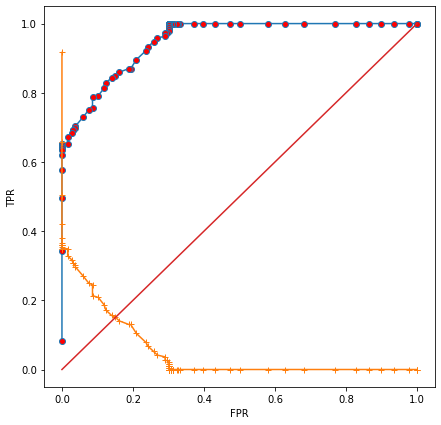

In [253]:
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,marker='o',markerfacecolor='r')
plt.plot(fpr,fnr,marker='+',markerfacecolor='green')
sns.lineplot(x=threshold)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [212]:
roc_auc=pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':threshold})

In [310]:
roc_auc[roc_auc.TPR>=0.70].sort_values(by='FPR')

,TPR,FPR,Threshold
81,0.703125,0.037634,0.81
80,0.729167,0.059140,0.80
79,0.750000,0.075269,0.79
78,0.755208,0.086022,0.78
77,0.786458,0.086022,0.77
...,...,...,...
4,1.000000,0.935484,0.04
3,1.000000,0.978495,0.03
2,1.000000,1.000000,0.02
1,1.000000,1.000000,0.01


In [433]:
res=[np.where(r>0.81,1,0) for r in result1]

In [434]:
confusion_matrix(test_target,res)

array([[179,   7],
       [ 57, 135]], dtype=int64)

In [435]:
print(classification_report(test_target,res))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       186
           1       0.95      0.70      0.81       192

    accuracy                           0.83       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.86      0.83      0.83       378



In [436]:
nb.predict(cv.transform(['Barclays and RBS shares suspended from trading'.lower()]))

array([1], dtype=int64)

In [437]:
result2=nb.predict_proba(train_features)[:,1]

In [438]:
res2=[np.where(r>0.7,1,0) for r in result2]

In [439]:
confusion_matrix(train_target,res2)

array([[1878,    1],
       [  49, 2047]], dtype=int64)

In [422]:
print(classification_report(train_target,res2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1879
           1       1.00      0.98      0.99      2096

    accuracy                           0.99      3975
   macro avg       0.99      0.99      0.99      3975
weighted avg       0.99      0.99      0.99      3975

